In [4]:
import pandas as pd
import pandas as pd
import re
import openpyxl
import datetime as dt
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import decimal

import os
import sys
# SRC_DIR = r'/home/pp/program/jupyter/'
sys.path.append(os.path.dirname(r'/home/pp/program/jupyter/'))
from config import *
from dbfread import DBF
# for record in DBF(r'/home/pp/program/jupyter/SHMU/dbobce.dbf', encoding='cp1252', char_decode_errors='strict'):
#      print(str(record))


dbf = DBF(r'/home/pp/program/jupyter/SHMU/obce.dbf', encoding = 'UTF-8', char_decode_errors='strict') #, encoding=None, char_decode_errors='strict')
frame = pd.DataFrame(iter(dbf))
frame
frame.info()
frame.head(30)

# Replace 'your_file.parquet' with the path to your Parquet file
df = pd.read_parquet(TEPLOTY_SK_DIR + 'teploty_sk.parquet')
# df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2927 non-null   int64  
 1   gml_id      2927 non-null   object 
 2   fid         2927 non-null   int64  
 3   osm_id      2927 non-null   object 
 4   osm_code    2902 non-null   float64
 5   osm_popula  2902 non-null   float64
 6   zbgis_idn4  2927 non-null   float64
 7   zbgis_nm4   2927 non-null   object 
 8   zbgis_idn3  2927 non-null   float64
 9   zbgis_nm3   2927 non-null   object 
 10  lat         2927 non-null   float64
 11  lon         2927 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 274.5+ KB


In [5]:
d = { 'a' : 5, 'b' : 7, 'c' : 10}
grp = [['ab', 1], ['cd', 2], ['ef', 3]]
grpli = grp
di = d.items()
print(d, di)
for x, y in grp:
    print(x, y)
for (x,y), l in grp:
    print(x, y, l)
for x in grpli:
    print(x)
    

{'a': 5, 'b': 7, 'c': 10} dict_items([('a', 5), ('b', 7), ('c', 10)])
ab 1
cd 2
ef 3
a b 1
c d 2
e f 3
['ab', 1]
['cd', 2]
['ef', 3]


In [6]:
# Save the dataframe into multiple parquet files, split by month in Cas_CET column
for (year, month), group in df.groupby([df['Cas_CET'].dt.year, df['Cas_CET'].dt.month]):
    print(f"Processing year: {year}, month: {month}")
    filename = f"{TEPLOTY_SK_DIR}teploty_sk_{year:04d}-{month:02d}.parquet"
    group.to_parquet(filename)
    print(f"Saved {filename} with {len(group)} records.")


Processing year: 2025, month: 7
Saved /home/pp/program/jupyter/SHMU/zber/teploty_sk/teploty_sk_2025-07.parquet with 3806 records.
Processing year: 2025, month: 8
Saved /home/pp/program/jupyter/SHMU/zber/teploty_sk/teploty_sk_2025-08.parquet with 72818 records.
Processing year: 2025, month: 9
Saved /home/pp/program/jupyter/SHMU/zber/teploty_sk/teploty_sk_2025-09.parquet with 70835 records.
Processing year: 2025, month: 10
Saved /home/pp/program/jupyter/SHMU/zber/teploty_sk/teploty_sk_2025-10.parquet with 71989 records.
Processing year: 2025, month: 11
Saved /home/pp/program/jupyter/SHMU/zber/teploty_sk/teploty_sk_2025-11.parquet with 2171 records.


In [7]:
import pandas as pd

# List of parquet files to read
files = [f"{TEPLOTY_SK_DIR}teploty_sk_{year:04d}-{month:02d}.parquet" for year in [2025] for month in range(7,11)]
print(files)
# Read and filter each file, then concatenate
dfs = [pd.read_parquet(f).query("Stanica != 'rezno'") for f in files]
filtered_df = pd.concat(dfs, ignore_index=True)
filtered_df.info()
filtered_df.head(20)

['/home/pp/program/jupyter/SHMU/zber/teploty_sk/teploty_sk_2025-07.parquet', '/home/pp/program/jupyter/SHMU/zber/teploty_sk/teploty_sk_2025-08.parquet', '/home/pp/program/jupyter/SHMU/zber/teploty_sk/teploty_sk_2025-09.parquet', '/home/pp/program/jupyter/SHMU/zber/teploty_sk/teploty_sk_2025-10.parquet']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219448 entries, 0 to 219447
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Stanica    219448 non-null  object        
 1   Teplota    219448 non-null  float64       
 2   Smer       217054 non-null  object        
 3   Rýchlosť   216637 non-null  float64       
 4   Nárazy     3124 non-null    object        
 5   Tlak       88810 non-null   float64       
 6   Oblačnosť  33256 non-null   object        
 7   Počasie    6372 non-null    object        
 8   Graf       0 non-null       float64       
 9   Cas_CET    219448 non-null  datetime64[us]
 10  fil

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,Cas_CET,file
0,Banská Bystrica - Zelená,24.4,SZ,2.0,None,1013.4,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
1,Sliač,24.7,S,3.0,None,1013.4,Oblačno,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
2,Skalnaté pleso,10.4,J,2.0,None,NaN,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
3,Silica,21.4,SZ,1.0,None,NaN,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
4,Senica,23.4,SZ,2.0,None,1015.1,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
5,Ružomberok,22.8,JZ,3.0,None,NaN,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
6,Rožňava,24.5,JV,1.0,None,1013.2,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
7,Roztoky,21.6,None,NaN,None,NaN,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
8,Rimavská Sobota,25.6,Z,1.0,None,NaN,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
9,Revúca,22.8,J,2.0,None,1013.5,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00


In [8]:

# print(df.head())
# print(df.describe())
# print(tf.info())
# print(df.filter(like=25, axis=0).head(20))
bdf = df[df['Stanica'] == 'Brezno']
# bdf = df[df.index == 8]
bdf.index.unique()

# print(bdf.info())

Index([8, 7, 6], dtype='int64')

In [9]:
bdf.loc[:,['Teplota','Tlak']].agg(['min', 'max', 'mean', 'std', 'count'])


,Teplota,Tlak
min,-4.300000,991.800000
max,34.200000,1030.000000
mean,13.231721,1017.864742
std,7.461793,6.179974
count,2254.000000,2252.000000


<Axes: title={'center': 'Brezno - Teplota a Tlak (1961-2023)'}, xlabel='Teplota', ylabel='Tlak'>

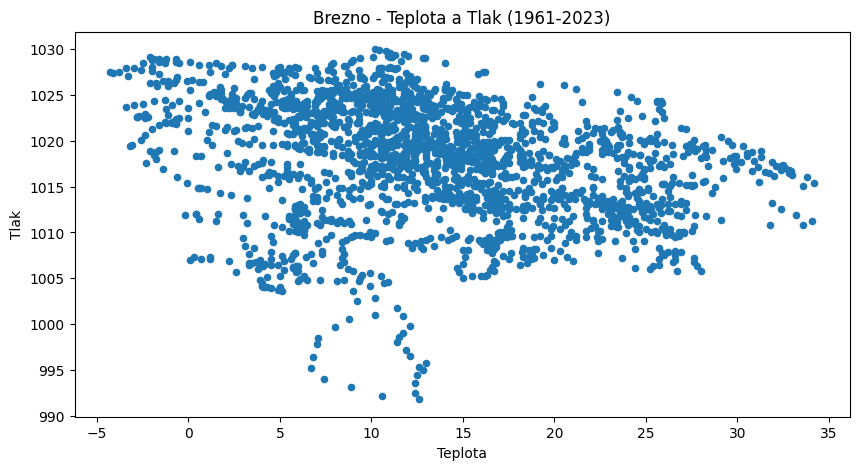

In [10]:
bdf.loc[:,['Teplota','Tlak']].plot(kind='scatter', x='Teplota', y='Tlak', figsize=(10,5), title='Brezno - Teplota a Tlak (1961-2023)')

In [11]:
result = bdf.set_index(bdf.Cas_CET).resample('D').agg({'Teplota':['min', 'max', 'mean'], 'Tlak':['mean']})  
# bdf.groupby(bdf.index).agg({'Teplota':['min', 'max', 'mean', 'std', 'count'], 'Tlak':['min', 'max', 'mean', 'std', 'count']}).plot(kind='line', y=('Teplota','mean'), figsize=(10,5), title='Brezno - Teplota (1961-2023)')    
result.to_excel(TEPLOTY_SK_DIR + 'teploty_brezno_den.xlsx')
# result.in
